## [2] Distributions

In the first chapter, having cleaned and validated your data, you began exploring it by using histograms to visualize distributions. In this chapter, you'll learn how to represent distributions using Probability Mass Functions (PMFs) and Cumulative Distribution Functions (CDFs). You'll learn when to use each of them, and why, while working with a new dataset obtained from the General Social Survey.

### Probability mass functions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# from empiricaldist import Pmf

In [ ]:
gss = pd.read_hdf('datasets/gss.hdf5', 'gss')
gss.head()

----

## Probability Mass Functions

### General Social Survey (GSS) Dataset
- has run annually since 1972
- surveys a representative sample of the adult US population
- annual sample of US population
- asks about demographics, social and political beliefs
- widely used by policy makers and researchers

In [ ]:
# educ - records the number of years of education for each respondent
educ = gss['educ']
plt.hist(educ.dropna(), label = 'educ')
plt.show()

> The peak is near 12 years of education.

Not the best way to represent this information. An alternative:

### Probability Mass Function (PMF)
- contains the unique value in the dataset and how often each one appears
- represents the possible values in a distribution and their probabilities

In [ ]:
# Pmf class computes a probability mass function
# based on Pandas series and provides methods aren't in Pandas

# 1st argument - any kind of sequence
# 2nd argument - don't normalize this PMF
pmf_educ = Pmf(educ, normalize = False)
pmf_educ.head()

> a series that contains the values on the left and the counts on the right. 
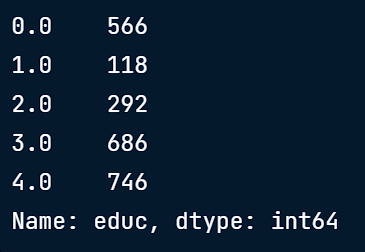 There are 566 respondents who report they have 0 years of formal education.

In [ ]:
# look up a value in Pmf and get a count
pmf_educ[12]

> There are 47689 respondents with 12 years of education, which is the most frequent value. 
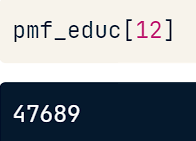

In [ ]:
# get the fraction  of respondents with each value, rather than the couns using normalize = True
pmf_educ = Pmf(educ, normalize = True)
pmf_educ.head()

> Normalized PMF, where frequencies add up to 1
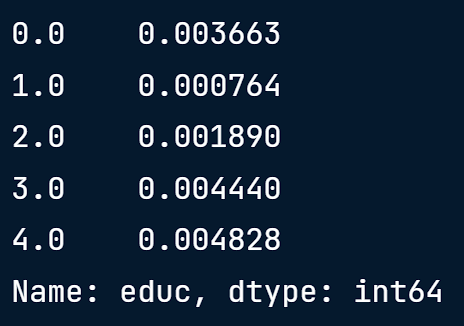 The fraction of people with 12 years of education 0.3896, a little more than 30%.

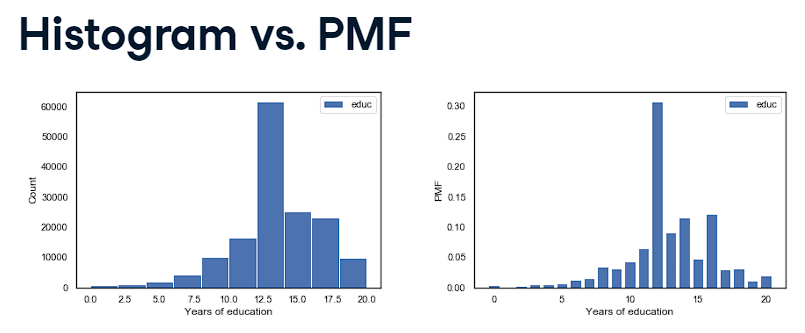
- PMF shows all unique values, shows exactly where the peaks are

**Make a PMF**

The GSS dataset has been pre-loaded for you into a DataFrame called `gss`. You can explore it in the IPython Shell to get familiar with it.

In this exercise, you'll focus on one variable in this dataset, `'year'`, which represents the year each respondent was interviewed.

The `Pmf` class you saw in the video has already been created for you. You can access it outside of DataCamp via the `empiricaldist` library.

- Make a PMF for `year` with `normalize = False` and display the result.

In [ ]:
# Compute the PMF for year
pmf_year = Pmf(gss['year'], normalize = False)

# Print the result
print(pmf_year)

- **How many respondents were interviewed in 2016?**

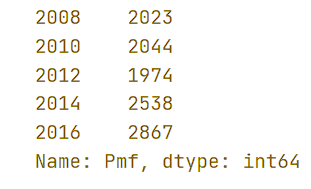

> 2867

**Plot a PMF**

Now let's plot a PMF for the age of the respondents in the GSS dataset. The variable `'age'` contains respondents' age in years.

- Select the `'age'` column from the `gss` DataFrame and store the result in `age`.

In [ ]:
# Select the age column
age = gss['age']

- Make a normalized PMF of `age`. Store the result in `pmf_age`.

In [ ]:
# Make a PMF of age
pmf_age = Pmf(age, normalize = True)

- Plot `pmf_age` as a bar chart.

In [ ]:
# Plot the PMF
pmf_age.bar()

# Label the axes
plt.xlabel('Age')
plt.ylabel('PMF')
plt.show()

> You could also use `pmf_age.plot()` to plot the `Pmf` as a line plot. 
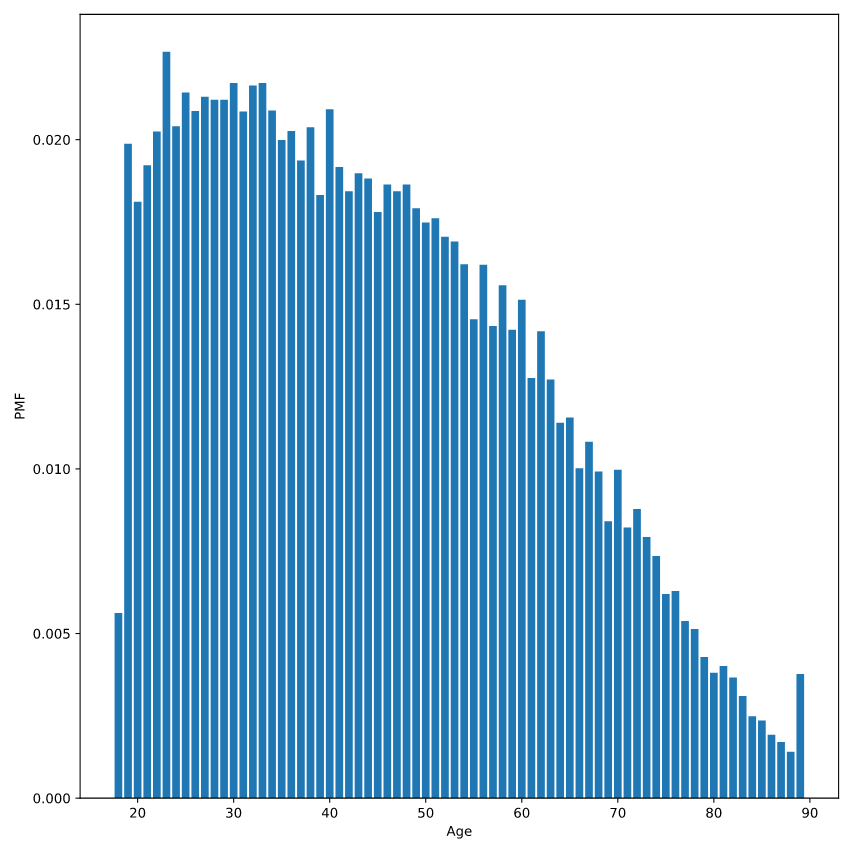

---

### Cumulative distribution function (CDF)
- useful for some computations
- great way to compare distributions


#### From PMF to CDF
If you draw a random element from a distribution:
- PMF (Probability Mass Function) is the probability that you get exactly 
- CDF (Cumulative Distribution Function) is the probability that you get a value <= x

X for a given value of x.

##### Example
- The CDF is the cumulative sum of the probabilities from the PMF.

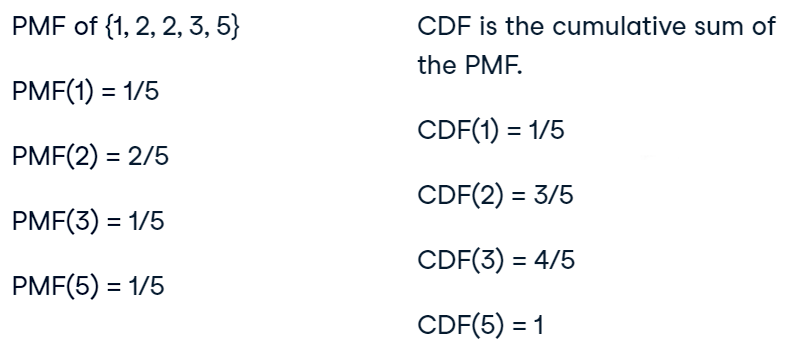
- The CDF of 2 is 3/5 because 3 out of the 5 values in the distribution are less than or equal to 2.
- The CDF of 5 is 1 or 100% because all of the values in the distribution are less than or equal to 5.

In [ ]:
cdf = Cdf(gss['age'])
cdf.plot()
plt.xlabel('Age')
plt.ylabel('CDF')
plt.show()

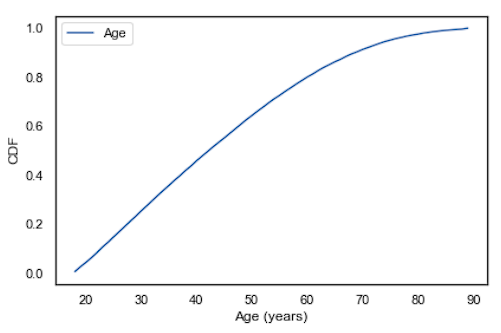
- The x axis is the ages, from 18 - 89
- The y axis is the cumulative probabilities, from 0 to 1.

### Evaluating the CDF

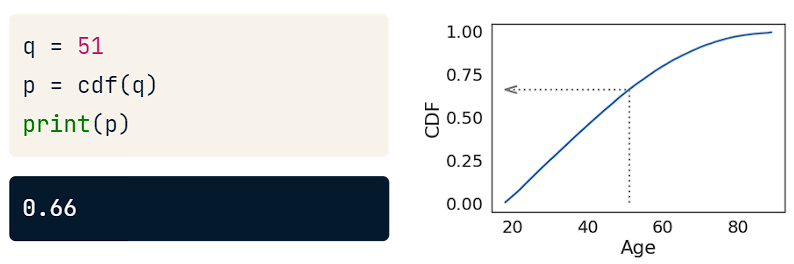
- CDF object can be used as a function, it returns the corresponding probability.

In this example,
- the age is quantity q which is 51
- the corresponding probability is p, which is 0.66. About 66% of the respondents are 51 years old or younger.

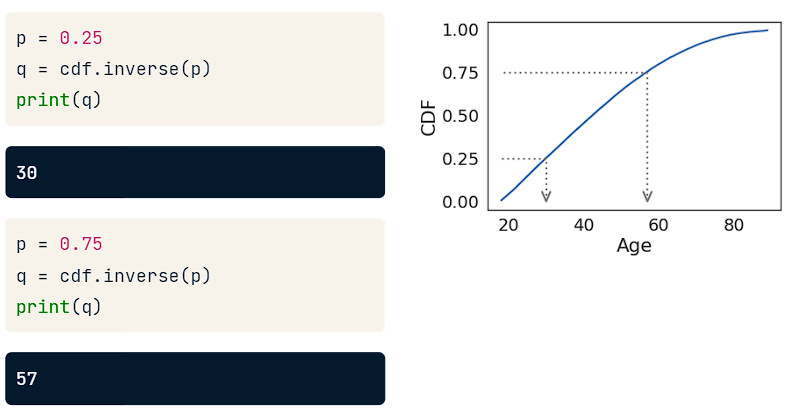
- CDF is an invertible function, if you have a probability p value, looking up the corresponding quantity q value is possible
- in the example, probability p 0.25 is looked up, which returns 30. Means 25% of the respondents are age 30 or less.
    - "Age 30 is 25th percentile of this distribution."
    
- The distance between the 25th and 75th percentile is called **interquartile range (IQR)** which measures the spread of disribution
    - since based on percentile, it doesn't get thrown off by extreme values or outliers
    - it works well even if there are errors in the data or extreme values

**Make a CDF**

In this exercise, you'll make a CDF and use it to determine the fraction of respondents in the GSS dataset who are OLDER than 30.

The GSS dataset has been preloaded for you into a DataFrame called gss.

- Select the 'age' column. Store the result in age.
- Compute the CDF of age. Store the result in cdf_age.
- Calculate the CDF of 30.

In [ ]:
# Select the age column
age = gss['age']

# Compute the CDF of age
cdf_age = Cdf(age)

# Calculate the CDF of 30
print(cdf_age[30])

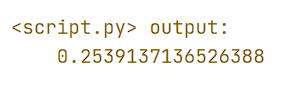

**What fraction of the respondents in the GSS dataset are OLDER than 30?**

> About 75%

**Compute IQR**

Recall from the video that the interquartile range (IQR) is the difference between the 75th and 25th percentiles. It is a measure of variability that is robust in the presence of errors or extreme values.

In this exercise, you'll compute the interquartile range of income in the GSS dataset. Income is stored in the `'realinc'` column, and the CDF of income has already been computed and stored in `cdf_income`.

- Calculate the 75th percentile of income and store it in `percentile_75th`.

In [ ]:
# Calculate the 75th percentile 
percentile_75th = cdf_income.inverse(0.75)
print(percentile_75th)

> 43426.0

- Calculate the 25th percentile of income and store it in `percentile_25th`.

In [ ]:
# Calculate the 25th percentile
percentile_25th = cdf_income.inverse(0.25)
print(percentile_25th)

> 13750.0

- Calculate the interquartile range of income. Store the result in `iqr`.

In [ ]:
# Calculate the interquartile range
iqr = percentile_75th - percentile_25th

# Print the interquartile range
print(iqr)

> 29676.0

**What is the interquartile range (IQR) of income in the GSS dataset?**

> Approximately 29676

**Plot a CDF**

The distribution of income in almost every country is long-tailed; that is, there are a small number of people with very high incomes.

In the GSS dataset, the variable `'realinc'` represents total household income, converted to 1986 dollars. We can get a sense of the shape of this distribution by plotting the CDF.

- Select `'realinc'` from the `gss` dataset.
- Make a Cdf object called `cdf_income`.
- Create a plot of `cdf_income` using `.plot()`.

In [ ]:
# Select realinc
income = gss['realinc']

# Make the CDF
cdf_income = Cdf(income)

# Plot it
cdf_income.plot()

# Label the axes
plt.xlabel('Income (1986 USD)')
plt.ylabel('CDF')
plt.show()

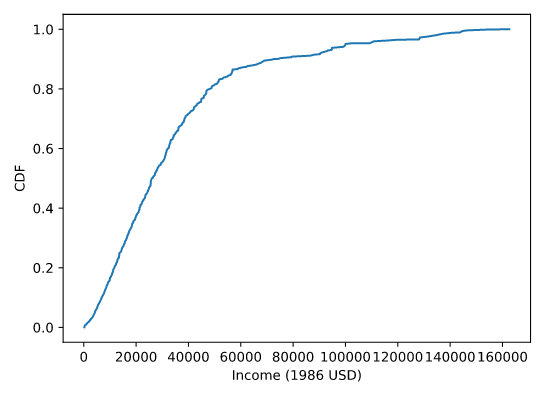

### Comparing distributions

- One way to compare distributions is to plot multiple PMFs on the same axes.

In [ ]:
# compare the distribution of age for male and female respondents

male = gss['sex'] == 1
age = gss['age']

male_age = age[male]
female_age = age[~male]

Pmf(male_age).plot(label = 'Male')
Pmf(female_age).plot(label = 'Female')

plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.show()

> It looks like there's more men in their twenties and there are more women in their 70s and 80s.
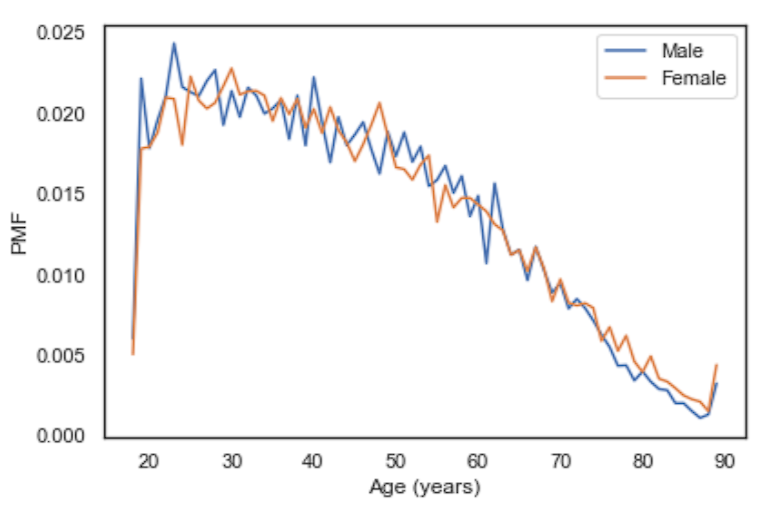

In [ ]:
Cdf(male_age).plot(label = 'Male')
cdf(female_age).plot(label = 'Female')

plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.show()

> In general, CDFs are smoother than PMFs bc it smooths out randomness, often getting a better view of real differences between distributions.
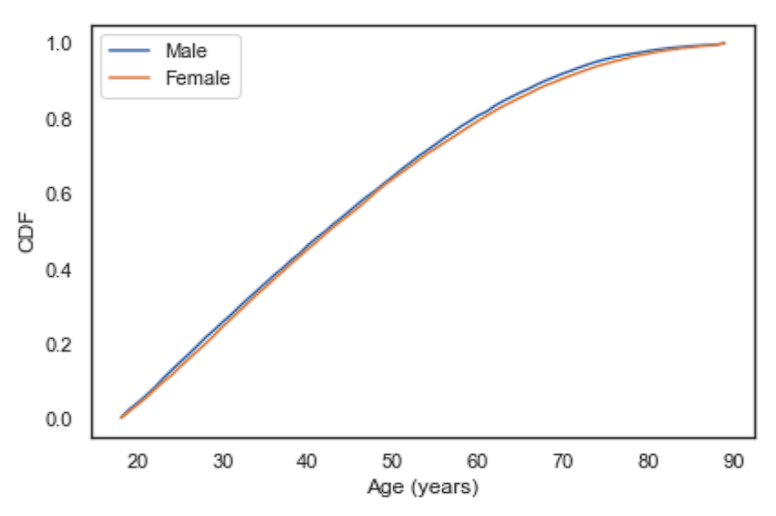
- In this dataset, the lines overlap over the whole range; means the distributions are nearly identical.
- Blue lines to the left of the orange line across the distibution, which shows that men are younger at every percentile. 
    - Or for every age, the fraction of men below that age is more than the fraction of women below that age.

### Income Distribution Dataset

- household income and compare the distribution before and after 1995 (roughly the midpoint of the survey)

In [ ]:
# represent household income in 1986 dollars

income = gss['realinc']
pre95 = gss['year'] < 1995

Pmf(income[pre95]).plot(label = 'Before 1995')
Pmf(income[~pre95]).plot(label = 'After 1995')

plt.xlabel('Income (1986 USD)')
plt.ylabel('PMF')
plt.show()

> The PMF is so noisy, the shape of the distribution is unclear. It looks like there are more people with high incomes after 1995, but it is still hard to tell.
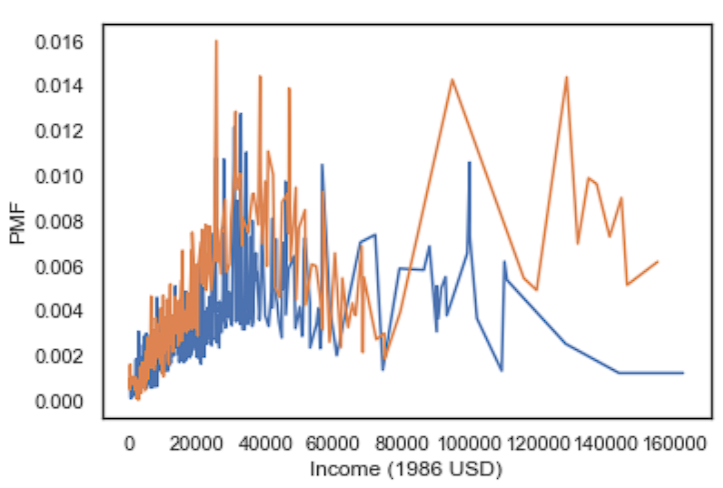

In [ ]:
Cdf(income[pre95]).plot(label = 'Before 1995')
Cdf(income[~pre95]).plot(label = 'After 1995')

plt.xlabel('Income (1986 USD)')
plt.ylabel('PMF')
plt.show()

> Below 30,000 USD, the CDFs are almost identical; above that, the orange distribution is shifted to the right. The fraction of people with incomes is about the same, but the income of high earners has increased.
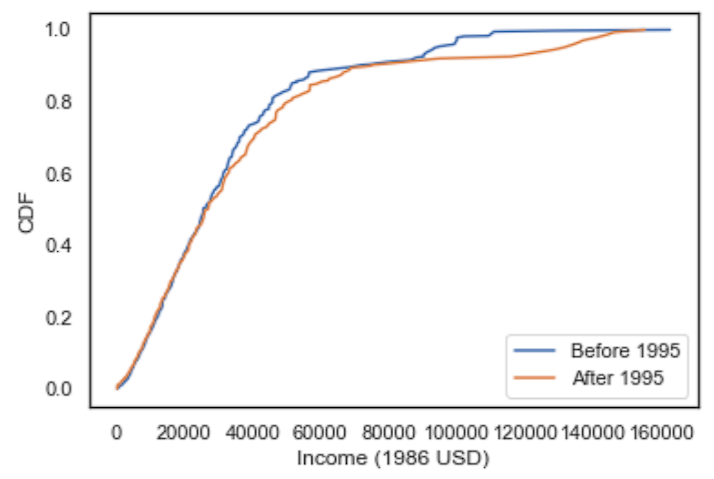

**Distribution of education**

Let's begin comparing incomes for different levels of education in the GSS dataset, which has been pre-loaded for you into a DataFrame called `gss`. The variable `educ` represents the respondent's years of education.

**What fraction of respondents report that they have 12 years of education or fewer?**

> Approximately 53%. If you evaluate the CDF at 12, you get the fraction of respondents with 12 or fewer years of eduction.

**Extract education levels**

Let's create Boolean Series to identify respondents with different levels of education.

In the U.S, 12 years of education usually means the respondent has completed high school (secondary education). A respondent with 14 years of education has probably completed an associate degree (two years of college); someone with 16 years has probably completed a bachelor's degree (four years of college).

- Complete the line that identifies respondents with associate degrees, that is, people with 14 or more years of education but less than 16.
- Complete the line that identifies respondents with 12 or fewer years of education.
- Confirm that the mean of `high` is the fraction we computed in the previous exercise, about 53%.

In [ ]:
# Select educ
educ = gss['educ']

# Bachelor's degree
bach = (educ >= 16)

# Associate degree
assc = (educ >= 14) & (educ < 16)

# High school (12 or fewer years of education)
high = educ <= 12
print(high.mean())

**Plot income CDFs**

Let's now see what the distribution of income looks like for people with different education levels. You can do this by plotting the CDFs. Recall how Allen plotted the income CDFs of respondents interviewed before and after 1995:

`Cdf(income[pre95]).plot(label='Before 1995')
Cdf(income[~pre95]).plot(label='After 1995')`
    
You can assume that Boolean Series have been defined, as in the previous exercise, to identify respondents with different education levels: `high`, `assc`, and `bach`.

- Fill in the missing lines of code to plot the CDFs.

In [ ]:
income = gss['realinc']

# Plot the CDFs
Cdf(income[high]).plot(label='High school')
Cdf(income[assc]).plot(label='Associate')
Cdf(income[bach]).plot(label='Bachelor')

# Label the axes
plt.xlabel('Income (1986 USD)')
plt.ylabel('CDF')
plt.legend()
plt.show()

> It might not be surprising that people with more education have higher incomes, but looking at these distributions, we can see where the differences are.
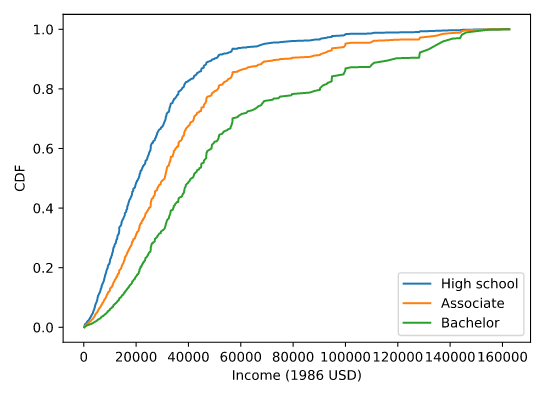

### Modeling Distributions

- PMFs don't work very well when data have a large number of unique values

#### Probability Density Functions

**Normal Distribution (Gaussian Distribution)**

In [ ]:
sample = np.random.normal(size = 1000)
Cdf(sample).plot()

> The sigmoid shape is what expected shape with values from a normal distribution
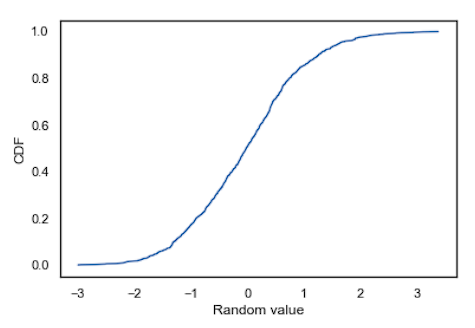

### The normal CDF
- SciPy provides an object called `norm` that represents normal distribution

In [2]:
from scipy.stats import norm

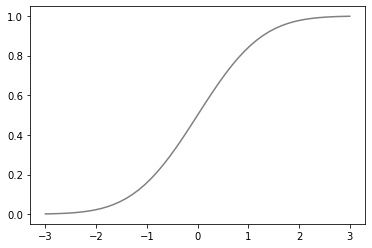

In [4]:
# np.linspace() to create an array of equally spaced points from -3 to 3
xs = np.linspace(-3, 3)
# norm(0, 1) creates an object that represents a normal distribution with mean 0 and standard deviation of 1
ys = norm(0, 1).cdf(xs)

plt.plot(xs, ys, color = 'gray')
plt.show()

In [ ]:
Cdf(sample).plot()

> The CDF of the sample is close to the normal CDF over the whole range
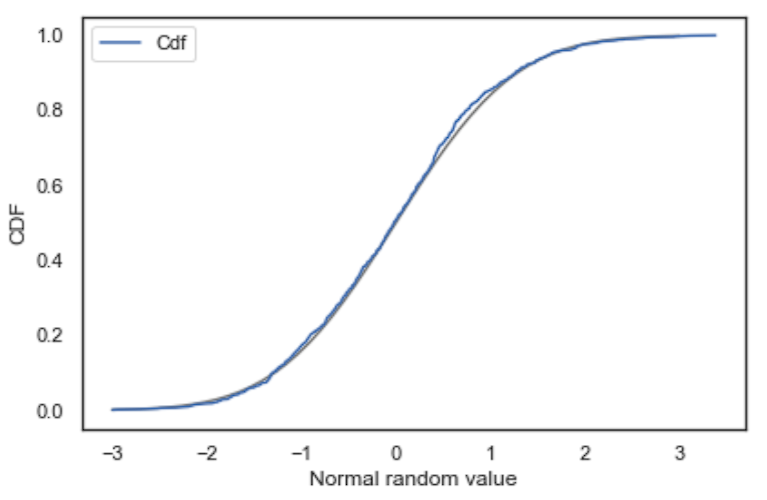

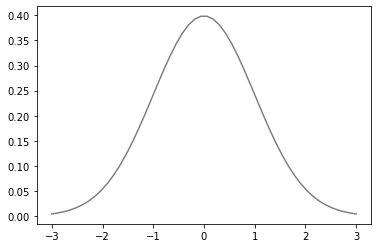

In [5]:
xs = np.linspace(-3, 3)
# .pdf() which evaluates the probability dennsity function (PDF)
ys = norm(0, 1).pdf(xs)

# bell curve
plt.plot(xs, ys, color = 'gray')
plt.show()

### Kernel Density Estimation (KDE)
- a way of getting from a PMF to a PDF

In [6]:
import seaborn as sns

In [ ]:
# takes the sample, estimates PDF, then plot
sns.kdeplot(sample)

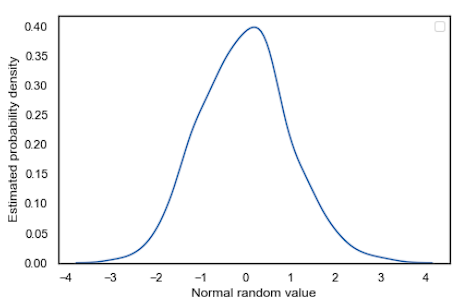

In [ ]:
xs = np.linspace(-3, 3)
ys = norm(0, 1).pdf(xs)

plt.plot(xs, ys, color = 'gray')
sns.kdeplot(sample)

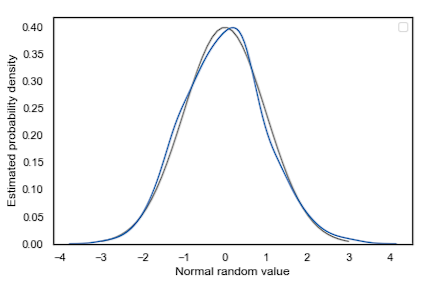

## Summary

- Use CDFs for exploration.
    - gives the best view of what's going on w/o getting distracted by noise
    - less well known
- Use PMFs if there are a small number of unique values.
- Use KDE if there are a lot of values.

---

**Distribution of income**

In many datasets, the distribution of income is approximately lognormal, which means that the logarithms of the incomes fit a normal distribution. We'll see whether that's true for the GSS data. As a first step, you'll compute the mean and standard deviation of the log of incomes using NumPy's `np.log10()` function.

Then, you'll use the computed mean and standard deviation to make a `norm` object using the `scipy.stats.norm()` function.

- Extract `'realinc'` from `gss` and compute its logarithm using `np.log10()`.
- Compute the mean and standard deviation of the result.
- Make a `norm` object by passing the computed mean and standard deviation to `norm()`.

In [ ]:
# Extract realinc and compute its log
income = gss['realinc']
log_income = np.log10(income)

# Compute mean and standard deviation
mean = log_income.mean()
std = log_income.std()
print(mean, std)

# Make a norm object
from scipy.stats import norm
dist = norm(mean, std)

> 4.371148677934171 0.4290082383271385

**Comparing CDFs**

To see whether the distribution of income is well modeled by a lognormal distribution, we'll compare the CDF of the logarithm of the data to a normal distribution with the same mean and standard deviation. These variables from the previous exercise are available for use:

```
# Extract realinc and compute its log
log_income = np.log10(gss['realinc'])

# Compute mean and standard deviation
mean, std = log_income.mean(), log_income.std()

# Make a norm object
from scipy.stats import norm
dist = norm(mean, std)
```

`dist` is a `scipy.stats.norm` object with the same mean and standard deviation as the data. It provides `.cdf()`, which evaluates the normal cumulative distribution function.

Be careful with capitalization: `Cdf()`, with an uppercase `C`, creates `Cdf` objects. `dist.cdf()`, with a lowercase `c`, evaluates the normal cumulative distribution function.

- Evaluate the normal cumulative distribution function using `dist.cdf`.
- Use the `Cdf()` function to compute the CDF of `log_income.
- Plot the result.

In [ ]:
# Evaluate the model CDF
xs = np.linspace(2, 5.5)
ys = dist.cdf(xs)

# Plot the model CDF
plt.clf()
plt.plot(xs, ys, color='gray')

# Create and plot the Cdf of log_income
Cdf(log_income).plot()
    
# Label the axes
plt.xlabel('log10 of realinc')
plt.ylabel('CDF')
plt.show()

> The lognormal model is a pretty good fit for the data, but clearly not a perfect match. That's what real data is like; sometimes it doesn't fit the model.
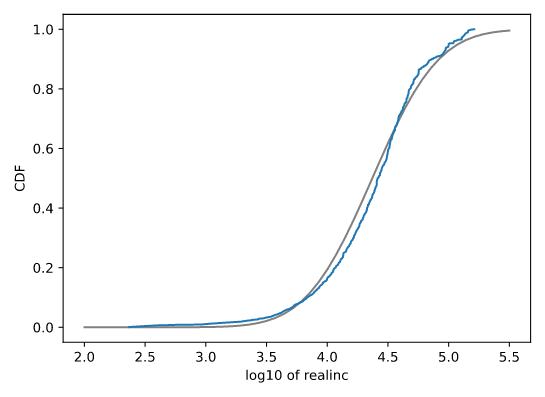

**Comparing PDFs**

In the previous exercise, we used CDFs to see if the distribution of income is lognormal. We can make the same comparison using a PDF and KDE. That's what you'll do in this exercise!

As before, the `norm` object `dist` is available in your workspace:

`
from scipy.stats import norm
dist = norm(mean, std)
`

Just as all `norm` objects have a `.cdf()` method, they also have a `.pdf()` method.

To create a KDE plot, you can use Seaborn's `kdeplot()` function. Here, Seaborn has been imported for you as `sns`.

- Evaluate the normal PDF using dist, which is a norm object with the same mean and standard deviation as the data.
- Make a KDE plot of the logarithms of the incomes, using log_income, which is a Series object.

In [ ]:
# Evaluate the normal PDF
xs = np.linspace(2, 5.5)
ys = dist.pdf(xs)

# Plot the model PDF
plt.clf()
plt.plot(xs, ys, color = 'gray')

# Plot the data KDE
sns.kdeplot(log_income)
    
# Label the axes
plt.xlabel('log10 of realinc')
plt.ylabel('PDF')
plt.show()

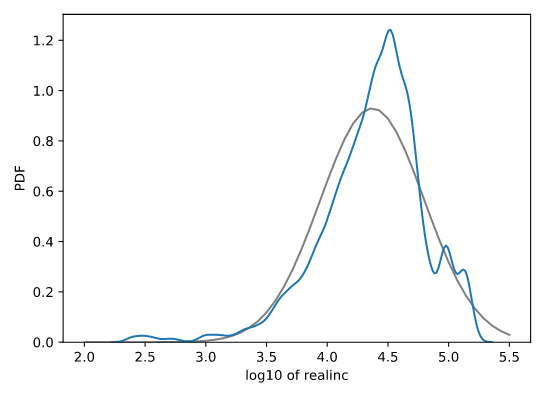